In [142]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq
import requests
import time

# Setup pythrend library and keyword define And Request Data: :

Question 1 To Find The Keyword From Google : ?

In [410]:
from pytrends.request import TrendReq

# Connect
pytrends = TrendReq(hl='en-US', tz=360)

# Keywords must be a list
keywords = ["Ai"]

# Payload
pytrends.build_payload(keywords, timeframe='today 12-m',geo='',gprop='')

time.sleep(5)
data = pytrends.interest_over_time()
print(data)

             Ai  isPartial
date                      
2024-09-08   49      False
2024-09-15   51      False
2024-09-22   50      False
2024-09-29   48      False
2024-10-06   48      False
2024-10-13   52      False
2024-10-20   52      False
2024-10-27   53      False
2024-11-03   55      False
2024-11-10   56      False
2024-11-17   59      False
2024-11-24   52      False
2024-12-01   55      False
2024-12-08   63      False
2024-12-15   55      False
2024-12-22   48      False
2024-12-29   48      False
2025-01-05   57      False
2025-01-12   58      False
2025-01-19   63      False
2025-01-26   65      False
2025-02-02   65      False
2025-02-09   62      False
2025-02-16   66      False
2025-02-23   65      False
2025-03-02   63      False
2025-03-09   64      False
2025-03-16   65      False
2025-03-23   70      False
2025-03-30   82      False
2025-04-06   69      False
2025-04-13   66      False
2025-04-20   69      False
2025-04-27   67      False
2025-05-04   66      False
2

D:\Anaconda\envs\pyfix\lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



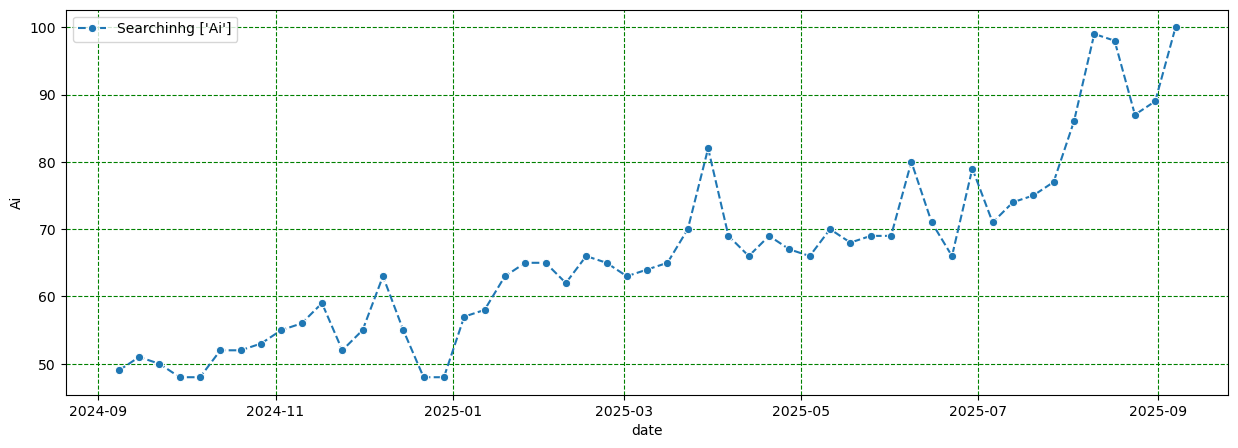

In [416]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='date',y='Ai',linestyle='--',marker='o',label=f'Searchinhg {keywords}')
plt.legend()
plt.grid(True,linestyle='--',color='green')
plt.show()

Q2 : KEEP OUT TOP 15 COUNTRIES WEHRE THE WORD IS SEARCHED MOSST AND CREATE VISUAL ?

In [418]:
time.sleep(10)
regions = pytrends.interest_by_region()
regions = regions.sort_values(by = keywords , ascending=False).head(15)
print(regions)

                  Ai
geoName             
China            100
Ethiopia          92
Myanmar (Burma)   87
Sri Lanka         79
Philippines       78
Vietnam           77
Pakistan          71
Nepal             71
Indonesia         66
Bangladesh        59
Cambodia          59
South Korea       56
Singapore         55
Hong Kong         53
Kenya             53


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18016\3103532487.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




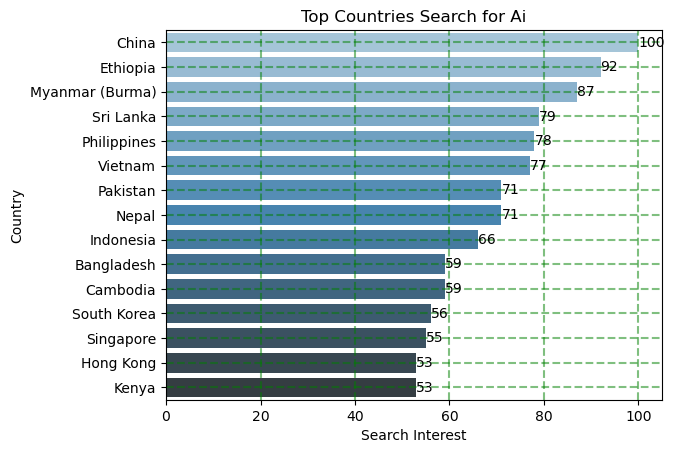

In [420]:
ax = sns.barplot(data=regions,x = keywords[0], y = 'geoName',palette='Blues_d',label = f'Keyword Search By Countries {regions}')
# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")  # remove decimals, adjust as needed

# Add title, legend, grid
plt.title(f'Top Countries Search for {keywords[0]}')
plt.xlabel("Search Interest")
plt.ylabel("Country")
plt.grid(True, color='green', linestyle='--', alpha=0.5,linewidth = 1.5)

plt.show()

Q3 : Showing It On World Map ?

In [424]:
regions = regions.reset_index()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18016\235535088.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



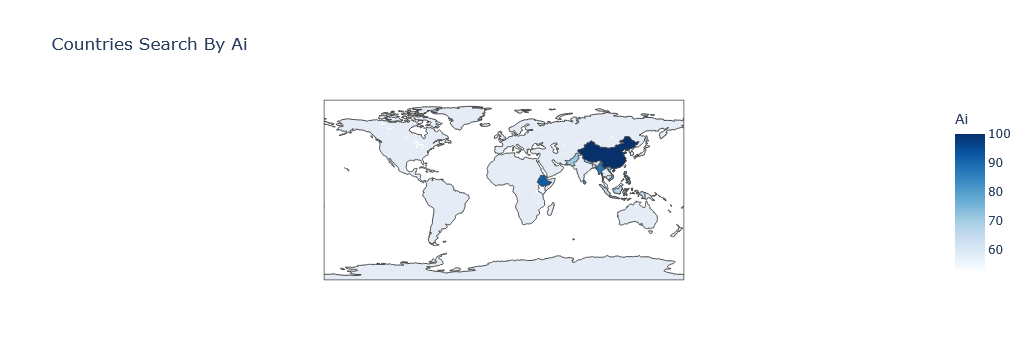

In [426]:
import plotly.express as px

fig = px.choropleth(
    regions,
    locations='geoName',
    locationmode='country names',   # "country names" is the correct mode
    color=keywords[0],              # ✅ pick the string column
    title=f'Countries Search By {keywords[0]}',
    color_continuous_scale='Blues'
)

fig.show()


# Over Time Intwrest :

In [428]:
Time = pytrends.interest_over_time()

D:\Anaconda\envs\pyfix\lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [430]:
print(Time)

             Ai  isPartial
date                      
2024-09-08   48      False
2024-09-15   50      False
2024-09-22   50      False
2024-09-29   48      False
2024-10-06   48      False
2024-10-13   52      False
2024-10-20   52      False
2024-10-27   53      False
2024-11-03   55      False
2024-11-10   56      False
2024-11-17   58      False
2024-11-24   52      False
2024-12-01   55      False
2024-12-08   62      False
2024-12-15   54      False
2024-12-22   47      False
2024-12-29   48      False
2025-01-05   57      False
2025-01-12   58      False
2025-01-19   62      False
2025-01-26   65      False
2025-02-02   65      False
2025-02-09   62      False
2025-02-16   65      False
2025-02-23   65      False
2025-03-02   63      False
2025-03-09   64      False
2025-03-16   65      False
2025-03-23   70      False
2025-03-30   82      False
2025-04-06   68      False
2025-04-13   65      False
2025-04-20   68      False
2025-04-27   66      False
2025-05-04   66      False
2

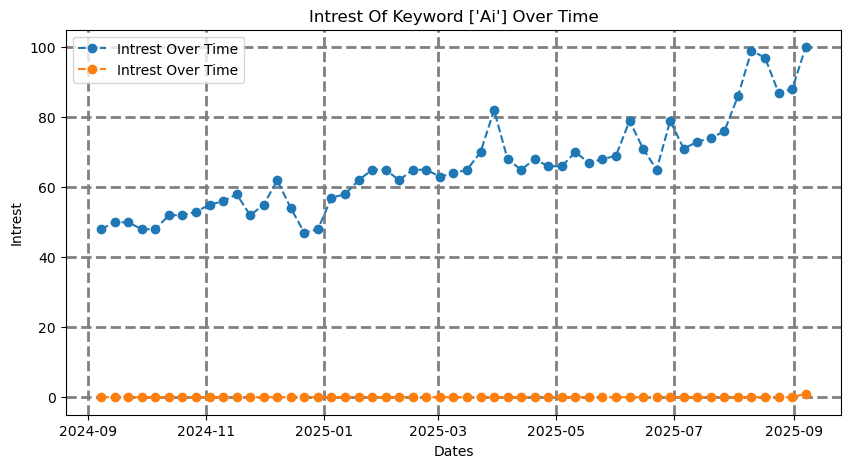

In [432]:
plt.figure(figsize=(10,5))
plt.plot(Time.index,Time.values,linestyle='--',marker='o',label='Intrest Over Time')
plt.legend()
plt.grid(True,linestyle='--',linewidth=2,color = 'gray')
plt.title(f'Intrest Of Keyword {keywords} Over Time')
plt.xlabel('Dates')
plt.ylabel('Intrest')
plt.show()

# Multiple Keywords Trend :

In [444]:
key_list = ['Web','Sql','Ai']
pytrends.build_payload(key_list,cat=0,timeframe='today 3-m',geo='',gprop='')
compare = pytrends.interest_over_time()

D:\Anaconda\envs\pyfix\lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [446]:
#print(compare)
compare = compare.drop(columns=['isPartial'],errors='ignore')
compare = compare.reset_index().melt(
    id_vars='date',
    value_vars= key_list,
    var_name='keywords',
    value_name='Search_Interest'
)

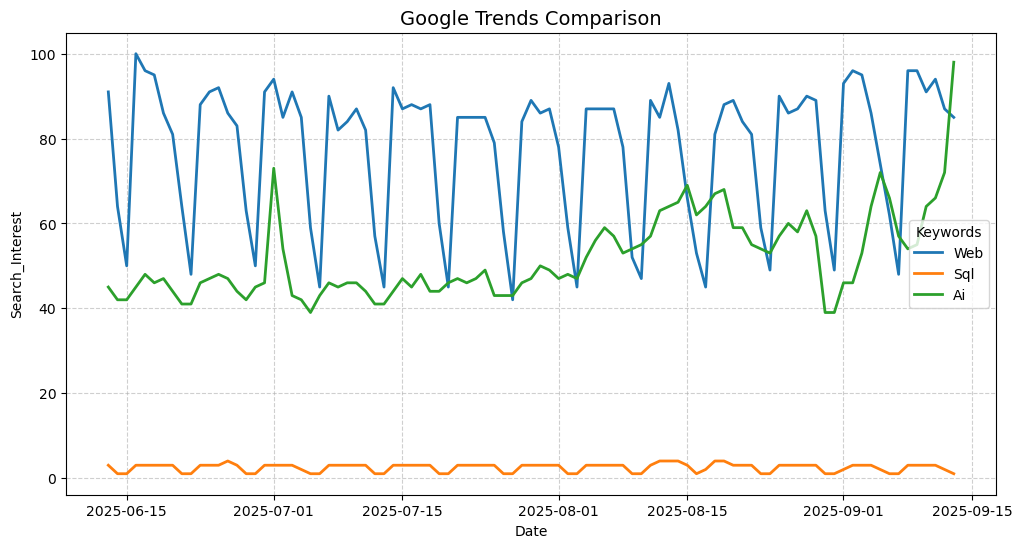

In [448]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=compare, 
    x="date", 
    y="Search_Interest",   # <-- match exact column name
    hue="keywords", 
    linewidth=2
)

plt.title("Google Trends Comparison", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Search_Interest")
plt.legend(title="Keywords")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [388]:
from pytrends.request import TrendReq

# Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=360)

# Build payload for keyword(s)
pytrends.build_payload(['AI'], timeframe='today 12-m')

# Print the raw widget JSON
print(pytrends.interest_over_time_widget)


{'request': {'time': '2024-09-13 2025-09-13', 'resolution': 'WEEK', 'locale': 'en-US', 'comparisonItem': [{'geo': {}, 'complexKeywordsRestriction': {'keyword': [{'type': 'BROAD', 'value': 'AI'}]}}], 'requestOptions': {'property': '', 'backend': 'IZG', 'category': 0}, 'userConfig': {'userType': 'USER_TYPE_SCRAPER'}}, 'lineAnnotationText': 'Search interest', 'bullets': [{'text': 'AI'}], 'showLegend': False, 'showAverages': False, 'helpDialog': {'title': 'Interest over time', 'content': 'Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.'}, 'token': 'APP6_UEAAAAAaMZmlVoxByALcjoD-ZXw9Ir8QqYXr7Kd', 'id': 'TIMESERIES', 'type': 'fe_line_chart', 'title': 'Interest over time', 'template': 'fe', 'embedTemplate': 'fe_embed', 'version': '1', 'isLong': True, 'isCurated': False}
